In [288]:
import pandas as pd

In [267]:
df = pd.read_csv('../data/internet_service_churn_updated.csv')

In [268]:
df_X = df.iloc[:, :-1]
df_y = df['churn']
states = ['churn', 'not_churn']

In [269]:
df_X.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,reamining_contract,download_avg,upload_avg,download_over_limit
0,1.0,0.0,11.95,0.14,8.4,2.3,0.0
1,0.0,0.0,8.22,0.00,0.0,0.0,0.0
2,1.0,0.0,8.91,0.00,13.7,0.9,0.0
3,0.0,0.0,6.87,0.00,0.0,0.0,0.0
4,0.0,0.0,6.39,0.00,0.0,0.0,0.0


In [270]:
df[df['is_tv_subscriber'] > 0]['churn'].value_counts(), df[df['is_movie_package_subscriber'] > 0]['churn'].value_counts()

(churn
 0.0    30525
 1.0    28084
 Name: count, dtype: int64,
 churn
 0.0    15822
 1.0     8195
 Name: count, dtype: int64)

In [271]:
df_X

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,reamining_contract,download_avg,upload_avg,download_over_limit
0,1.0,0.0,11.95,0.14,8.4,2.3,0.0
1,0.0,0.0,8.22,0.00,0.0,0.0,0.0
2,1.0,0.0,8.91,0.00,13.7,0.9,0.0
3,0.0,0.0,6.87,0.00,0.0,0.0,0.0
4,0.0,0.0,6.39,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
71888,1.0,1.0,0.09,1.25,0.0,0.0,0.0
71889,1.0,0.0,0.06,1.63,0.8,0.0,0.0
71890,1.0,0.0,0.02,2.19,1.5,0.2,0.0
71891,0.0,0.0,0.01,0.72,0.0,0.0,0.0


In [272]:
df_y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: churn, dtype: float64

### Стандартизація

In [273]:
df_X.mean(axis=0), df_X.std(axis=0)

(is_tv_subscriber                0.815225
 is_movie_package_subscriber     0.334066
 subscription_age                2.455486
 reamining_contract              0.497612
 download_avg                   43.689911
 upload_avg                      4.192076
 download_over_limit             0.208713
 dtype: float64,
 is_tv_subscriber                0.388117
 is_movie_package_subscriber     0.471666
 subscription_age                2.026856
 reamining_contract              0.665755
 download_avg                   63.405963
 upload_avg                      9.818896
 download_over_limit             0.999647
 dtype: float64)

In [274]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_sc_X = scaler.fit_transform(df_X)

In [275]:
df_sc_X.mean(axis=0), df_sc_X.std(axis=0)

(array([-4.11146813e-17, -3.47893457e-17, -1.01205369e-16, -7.59040270e-17,
         7.43226931e-17,  7.43226931e-17,  3.16266779e-17]),
 array([1., 1., 1., 1., 1., 1., 1.]))

In [276]:
pd.DataFrame(df_sc_X, df_y).head()

,0,1,2,3,4,5,6
churn,,,,,,,
0.0,0.476083,-0.708273,4.684387,-0.537157,-0.556575,-0.192699,-0.208788
1.0,-2.100476,-0.708273,2.844086,-0.747446,-0.689055,-0.426943,-0.208788
1.0,0.476083,-0.708273,3.184517,-0.747446,-0.472986,-0.335282,-0.208788
1.0,-2.100476,-0.708273,2.178025,-0.747446,-0.689055,-0.426943,-0.208788
1.0,-2.100476,-0.708273,1.941204,-0.747446,-0.689055,-0.426943,-0.208788


### Тренування моделі

In [277]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_sc_X, df_y, test_size=0.3, random_state=1)

In [278]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

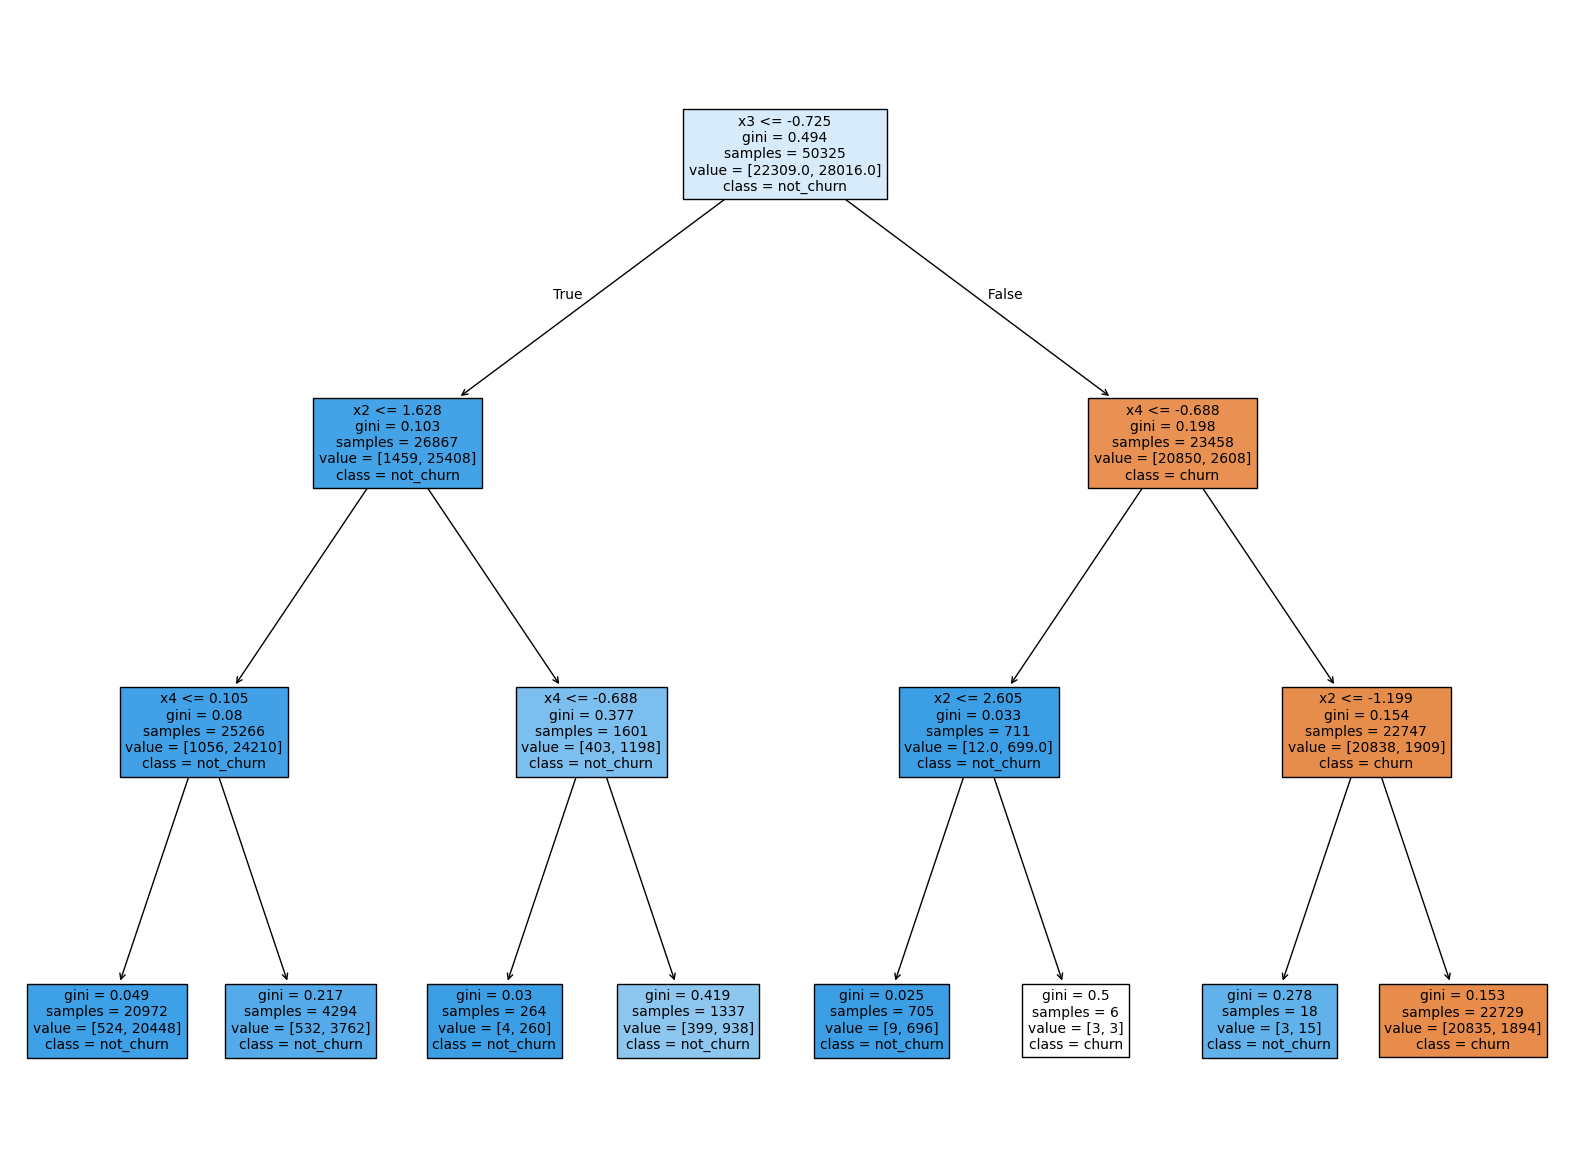

In [279]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(20, 15)) 
plot_tree(tree, feature_names=[f'x{i}' for i in range(5)], class_names=states, filled=True, fontsize=10, ax=ax)
plt.show()

In [280]:
y_pred_forest = tree.predict_proba(X_test)

In [281]:
y_pred_forest[:5]

array([[0.91667033, 0.08332967],
       [0.0249857 , 0.9750143 ],
       [0.91667033, 0.08332967],
       [0.91667033, 0.08332967],
       [0.0249857 , 0.9750143 ]])

In [282]:
y_pred_forest = tree.predict(X_test)
y_pred_forest[:5]

array([0., 1., 0., 0., 1.])

In [283]:
y_test.head()

23258    0.0
71543    1.0
63849    0.0
56025    0.0
49274    1.0
Name: churn, dtype: float64

In [286]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      9534
         1.0       0.95      0.93      0.94     12034

    accuracy                           0.94     21568
   macro avg       0.93      0.94      0.93     21568
weighted avg       0.94      0.94      0.94     21568



In [289]:
import pickle

with open('../models/decision_tree.pkl', 'wb') as f:
    pickle.dump(tree, f)

In [292]:
# check loaded model
with open('../models/decision_tree.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    y_pred_forest = tree.predict(X_test)
    print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      9534
         1.0       0.95      0.93      0.94     12034

    accuracy                           0.94     21568
   macro avg       0.93      0.94      0.93     21568
weighted avg       0.94      0.94      0.94     21568

